# Lab 5 - Linear Regression

Welcome to this week's lab on Linear Regression! This week, we will train our first machine learning model using linear regression! We will explore and implement a simple linear regression model using `scikit-learn` to predict a dependent variable based on an independent variable.

## Part 1: Linear Regression Walkthrough
We will use a synthetic dataset generated for the purpose of this exercise, representing the relationship between hours studied (independent variable) and exam scores (dependent variable).

### Step 1: Import Necessary Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib.ticker import MaxNLocator

### Step 2: Generate Dataset

In [46]:
# Generate synthetic data: hours studied vs exam score
np.random.seed(0)  # For reproducibility
hours_studied = np.random.rand(100, 1) * 10  # Random values in a 10-hour range
exam_scores = 2 * hours_studied + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Convert to a DataFrame for easier handling
data = pd.DataFrame({'Hours Studied': hours_studied.flatten(), 'Exam Score': exam_scores.flatten()})

### Step 3: Visualize Data

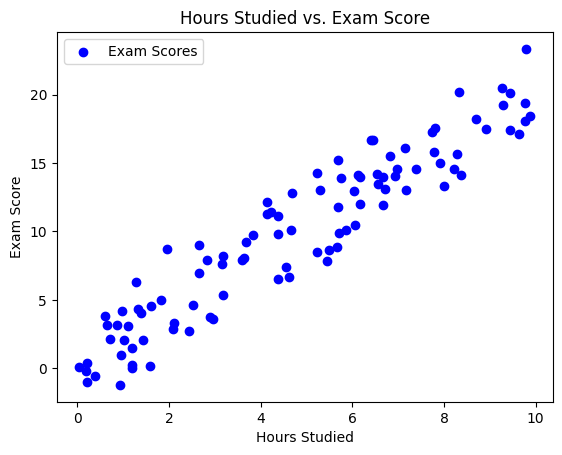

In [47]:
plt.scatter(data['Hours Studied'], data['Exam Score'], color='blue', label='Exam Scores')
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

What do you infer from the visualized data?

*The scatter plot shows a positive correlation between hours studied and exam scores, indicating that students generally score higher with more study time. There is variability in the data, suggesting other factors also influence exam scores. The data points are concentrated between 2 to 6 hours of study, with a wide range of scores from about 3 to 18.*

### Step 4: Prepare Data

In [48]:
# Split the dataset
X = data[['Hours Studied']]
y = data['Exam Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Why do we split data? How do you decide the portions for train and test sets?

*We split data into training and test sets to evaluate the performance of a predictive model: the training set is used to fit the model, and the test set is used to assess its generalization to unseen data. The portions for train and test sets are decided based on the dataset size and the need for balance between having enough data to train the model effectively and enough to validate its performance accurately; commonly, a split of 70-80% for training and 20-30% for testing is used. The random_state parameter is set to ensure reproducibility, so that the split is the same each time the code is run.*

### Step 5: Create and Train Model

In [49]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

### Step 6: Model Evaluation

In [50]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1.60
R-squared: 0.85


### Step 7: Make Predictions

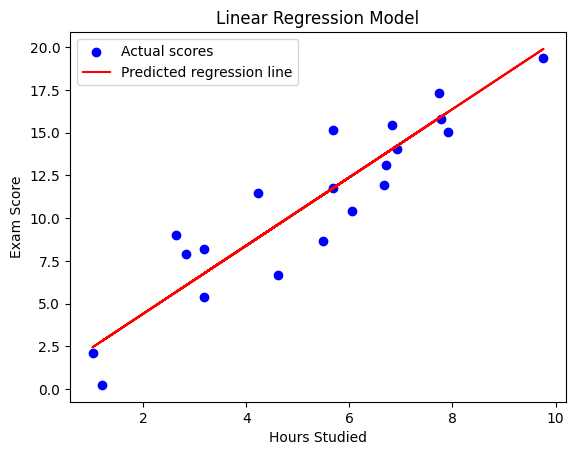

In [51]:
# Visualization of the model predictions
plt.scatter(X_test, y_test, color='blue', label='Actual scores')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

Discuss about your findings.

*The plot illustrates the fit of a linear regression model to the data on hours studied versus exam scores. The blue dots represent the actual scores observed, and the red line depicts the predicted regression line. The model suggests that there is a linear relationship between the hours studied and the exam scores, with the predicted score increasing as the hours studied increase. The fit looks good as the line passes through the majority of the data points, indicating the model's predictions are close to the actual scores for most observations.*

## Part 2: Implement a Regression Model

Apply your understanding of linear regression to a new dataset to predict `y` based on `x`. Find and use any dataset of your choice to complete this task.

### Task 1: Implement the Regression Model

In [52]:
life_expectancy_data = pd.read_excel('LifeExpectancy.xlsx')
life_expectancy_data.head()

,Year,World,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),"Yemen, Rep.",Zambia,Zimbabwe
0,1960,50.76101,31.436,61.309,45.961,31.539,62.381,62.852,64.084,67.78571,...,66.6,64.811,55.456,45.067,56.926,42.406,61.659,36.869,43.622,49.981
1,1961,NaN,31.767,62.272,46.493,31.935,62.422,63.274,64.429,67.90000,...,67.1,65.023,55.868,45.672,57.444,42.876,61.944,37.133,44.008,50.353
2,1962,NaN,32.113,63.116,47.043,32.331,62.439,63.701,64.747,67.84000,...,66.9,65.202,56.284,46.276,57.950,43.363,62.225,37.394,44.380,50.714
3,1963,NaN,32.475,63.811,47.613,32.726,62.447,64.131,65.053,67.78000,...,66.6,65.338,56.702,46.879,58.441,43.859,62.519,37.653,44.738,51.062
4,1964,NaN,32.853,64.345,48.203,33.121,62.462,64.562,65.356,67.72000,...,66.8,65.429,57.118,47.480,58.917,44.347,62.835,37.911,45.085,51.398


In [61]:
# Dropping rows where 'World' life expectancy is NaN to keep only complete data
life_expectancy_data.dropna(subset=['World'], inplace=True)

# Convert the 'Year' column to integer
life_expectancy_data['Year'] = life_expectancy_data['Year'].astype(int)

# Prepare the dataset
X = life_expectancy_data[['Year']]
y = life_expectancy_data['World']

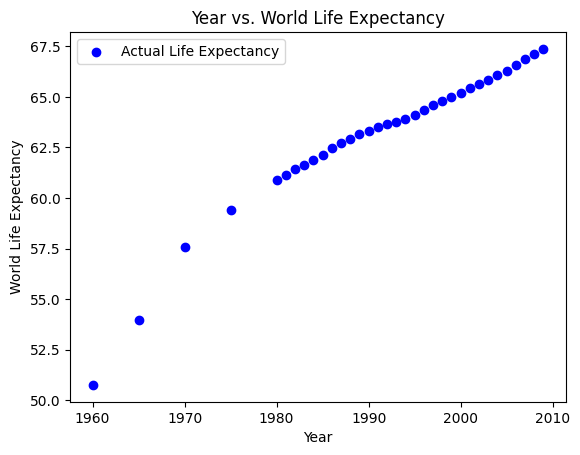

In [62]:
# Visualization of the dataset
plt.scatter(X, y, color='blue', label='Actual Life Expectancy')
plt.title('Year vs. World Life Expectancy')
plt.xlabel('Year')
plt.ylabel('World Life Expectancy')
plt.legend()
plt.show()

*This plot shows the actual life expectancy data points across different years. There's a clear upward trend, indicating that the average global life expectancy has been increasing over time. The plot suggests a strong positive relationship between time and life expectancy, with no apparent outliers or anomalies in the data.*

In [63]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

In [65]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.43
R-squared: 0.85


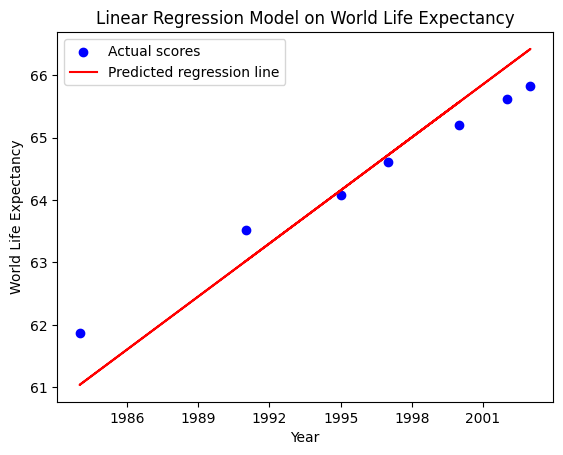

In [66]:
# Visualization of the model predictions

plt.scatter(X_test, y_test, color='blue', label='Actual scores')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model on World Life Expectancy')
plt.xlabel('Year')
plt.ylabel('World Life Expectancy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend()
plt.show()

*The linear regression plot suggests a strong positive correlation between time and global life expectancy, indicating that as years progress, the average life expectancy around the world increases. The model's predictions align closely with the actual data, as evidenced by the red regression line tracking through the center of the blue data points. This alignment implies that the model can reliably predict life expectancy based on the year, within the range of the data provided.*

### Task 2: Explain your implementation
Provide detailed explanation and discussion about your implementation. Break it down to different steps as relevant to your implementation.

**Step 1: Data Loading and Preparation**

We began by loading the data from an Excel file into a Pandas DataFrame. We noticed that the dataset contained life expectancy data for the world along with individual countries, across multiple years. To clean up the data for analysis, we converted the 'Year' column to an integer type to remove any decimals and handled missing values in the 'World' life expectancy column by dropping rows with NaN values.

**Step 2: Data Visualization**

Before applying any machine learning models, we visualized the relationship between the years and the world life expectancy. This was done by plotting a scatter plot with years on the x-axis and life expectancy on the y-axis. The scatter plot helps us see the overall trend and understand if a linear model would be a good fit for our data.

**Step 3: Dataset Splitting**

The dataset was split into a training set and a test set using the train_test_split function from the scikit-learn library. We allocated 80% of the data to the training set and the remaining 20% to the test set, ensuring that we have enough data to train our model while also having a separate set to evaluate its performance.

**Step 4: Model Training**

A LinearRegression model was instantiated and trained using the training data. This step involves finding the best-fitting line through the data points, which minimizes the sum of the squared differences between the observed values and the model's predictions.

**Step 5: Model Evaluation**

After training, the model's predictions were made on the test set, and we calculated the Mean Absolute Error (MAE) and the coefficient of determination (R2), which are common metrics to evaluate the performance of regression models. A low MAE and a high R2 value indicated that our model was performing well.

**Step 6: Visualization of Results**

We plotted the test data and the model's predictions to visually assess how well our model captured the trend in the data. The actual test data was plotted as blue dots, and the model's predictions were shown as a red line. To ensure readability and accuracy, we formatted the x-axis to display years as integers by using MaxNLocator with the integer=True option.

Through this process, we were able to build and visualize a model that demonstrates a strong linear relationship between the year and the world's average life expectancy, with the visualization confirming that the linear model is appropriate for the data.

## Submission
Submit a link to your completed Jupyter Notebook file hosted on your private GitHub repository through the submission link in Blackboard.